<b>Homework 04 - Clustering: K-means
>Kevin Yang 50541650

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans

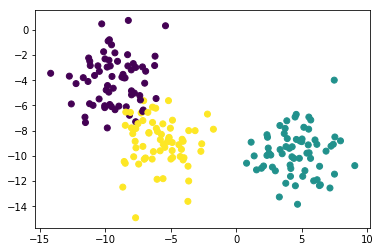

In [2]:
X, y = make_blobs(n_samples = 200, centers = 3, n_features = 2, random_state = 21, cluster_std = 1.8)
plt.scatter(X[:,0], X[:,1], c = y)
plt.show()

In [3]:
print("X:\n{}".format(X[:5]))
print("y:\n{}".format(y[:5]))

X:
[[ -8.4796732  -10.59435522]
 [ -4.89258431  -8.94718551]
 [-11.18753493  -2.49554353]
 [  2.34057229  -8.32943212]
 [ -7.10270071  -6.36798487]]
y:
[2 2 0 1 0]


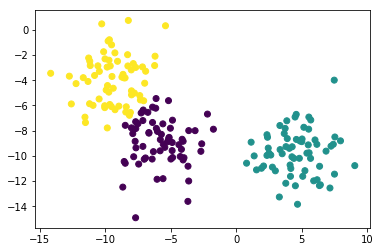

In [4]:
sklearn_prediction = KMeans(n_clusters = 3, random_state = 2019).fit_predict(X)
plt.scatter(X[:,0], X[:,1], c = sklearn_prediction)
plt.show()

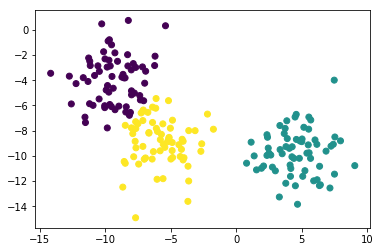

In [5]:
sklearn_prediction_rmap = {2:0, 0:2, 1:1}
sklearn_prediction = [sklearn_prediction_rmap[l] for l in sklearn_prediction]
plt.scatter(X[:,0], X[:,1], c = sklearn_prediction)
plt.show()

In [6]:
print("\nConfusion matrix from sklearn-kmeans: ")
cm_from_sklearn = confusion_matrix(y, sklearn_prediction)
print(cm_from_sklearn)
print("\nConfusion matrix from sklearn-kmeans (ratios): ")
print(cm_from_sklearn / np.sum(cm_from_sklearn, axis = 1))


Confusion matrix from sklearn-kmeans: 
[[63  0  4]
 [ 0 67  0]
 [ 3  0 63]]

Confusion matrix from sklearn-kmeans (ratios): 
[[0.94029851 0.         0.06060606]
 [0.         1.         0.        ]
 [0.04477612 0.         0.95454545]]


In [7]:
print("Accuracy by label: ")
acc_by_group_from_sklearn = np.diagonal(cm_from_sklearn / np.sum(cm_from_sklearn, axis = 1))
for i, a in enumerate(acc_by_group_from_sklearn):
    print("Group {} acc: {:.3f}".format(i, a))

Accuracy by label: 
Group 0 acc: 0.940
Group 1 acc: 1.000
Group 2 acc: 0.955


In [8]:
def distance(a, b):
    return np.linalg.norm(a - b)

In [9]:
def my_kmeans(X, k, random_state = 0):
    np.random.seed(random_state)
    pred_classes = np.zeros(len(X), dtype = int)
    
    mi = np.random.choice(len(X), size = k, replace = False)
    
    for i in range(X.shape[0]):
        mindist = np.inf
        minindx = -1
        for j in range(k):
            dist = distance(X[i], X[mi[j]])
            if dist < mindist:
                mindist = dist
                minindx = mi[j]
                pred_classes[i] = j
                
    for m in range(k):
        X[mi[m]] = np.mean(X[pred_classes == m], axis = 0)
                  
    return np.array(pred_classes) 

In [10]:
pred_classes = my_kmeans(X,3)

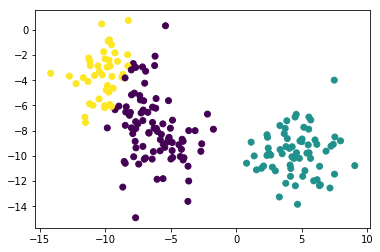

In [11]:
pred_classes = my_kmeans(X, 3)
plt.scatter(X[:,0], X[:,1], c = pred_classes)
plt.show()

In [12]:
#my_kmeans_rmap = {2:0, 0:2, 1:1}
#pred_classes = [my_kmeans_rmap[1] for l in pred_classes]
#plt.scatter(X[:,0], X[:,1], c = pred_classes)
#plt.show()

In [13]:
print("\nConfusion matrix from my_kmeans: ")
cm_my_kmeans = confusion_matrix(y, pred_classes)
print(cm_my_kmeans)
print("\nConfusion matrix from sklearn-kmeans (ratios): ")
print(cm_my_kmeans / np.sum(cm_my_kmeans, axis = 1))


Confusion matrix from my_kmeans: 
[[24  0 43]
 [ 0 67  0]
 [66  0  0]]

Confusion matrix from sklearn-kmeans (ratios): 
[[0.35820896 0.         0.65151515]
 [0.         1.         0.        ]
 [0.98507463 0.         0.        ]]


In [14]:
print("Accuracy by label: ")
acc_by_group_my_kmeans = np.diagonal(cm_my_kmeans) / np.sum(cm_my_kmeans, axis = 1)
for i , a in enumerate(acc_by_group_my_kmeans):
    print("Group {} acc: {:.3f}".format(i , a))

Accuracy by label: 
Group 0 acc: 0.358
Group 1 acc: 1.000
Group 2 acc: 0.000
